In [391]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from crop_image import *
import imutils
from imutils import contours as imcnts
import skimage.io as io
from skimage.exposure import histogram
from bubble_sheet_answer import *
from paper_extraction import *
%matplotlib inline

In [335]:
image = cv2.imread('omr.jpg')
cv2.imshow('omr.jpg',image)
cv2.waitKey(0)

-1

In [336]:
gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray scale image.jpg',gray_scale)
cv2.waitKey(0)

-1

In [337]:
"""gaussian = cv2.GaussianBlur(image,(3,3),0)
cv2.imshow('image',gaussian)
cv2.waitKey(0)"""

"gaussian = cv2.GaussianBlur(image,(3,3),0)\ncv2.imshow('image',gaussian)\ncv2.waitKey(0)"

In [338]:
edged = cv2.Canny(gray_scale,50,200)
# cv2.imshow('edged.jpg',edged)
# cv2.waitKey(0)

In [339]:
contours,_= cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))
  
cv2.drawContours(image, contours, -1,(0,255,0), 3)
  
# cv2.imshow('Contours.jpg', image)
# cv2.waitKey(0)
image = cv2.imread('omr.jpg')

Number of Contours found = 3


In [340]:
#sorting all contours
if(len(contours)>0):
    contours=sorted(contours,key=cv2.contourArea,reverse=True)

In [341]:
cv2.drawContours(image, contours, 0,(0,255,0), 3)
  
# cv2.imshow('Contours3.jpg', image)
# cv2.waitKey(0)
image = cv2.imread('omr.jpg')

In [342]:
paper_contour=None
for cnt in contours:
    peri = cv2.arcLength(cnt,True)
    print(peri)
    # to approximate the given shape to polygon (high value leads to underestimation and low value leads to overestimation)
    ratio=0.02
    approx=cv2.approxPolyDP(cnt,ratio*peri,True)
    cv2.drawContours(image, [approx], 0,(0,0,255), 3)
    print(len(approx))
    coordinates=approx.ravel()
    for i in range(0,len(coordinates),2):
        x=coordinates[i]
        y=coordinates[i+1]
        cv2.putText(image, "vertex"+str(i//2), (x, y),cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0)) 
    if(len(approx)==4):
        paper_contour=approx
        break
# cv2.imshow('Contours2.jpg', image)
# cv2.waitKey(0)
image = cv2.imread('omr.jpg')

2800.3675310611725
4


In [343]:
print(paper_contour.shape)

(4, 1, 2)


In [385]:
paper= four_point_transform(image, paper_contour.reshape(4, 2))  
cv2.imshow('paper', paper)
cv2.waitKey(0)

-1

In [386]:
gray_scale_paper= four_point_transform(gray_scale, paper_contour.reshape(4, 2))  
gray_scale_paper= four_point_transform(gray_scale_paper, paper_contour.reshape(4, 2))  
cv2.imshow('paper', gray_scale_paper)
cv2.waitKey(0)

-1

[  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182]


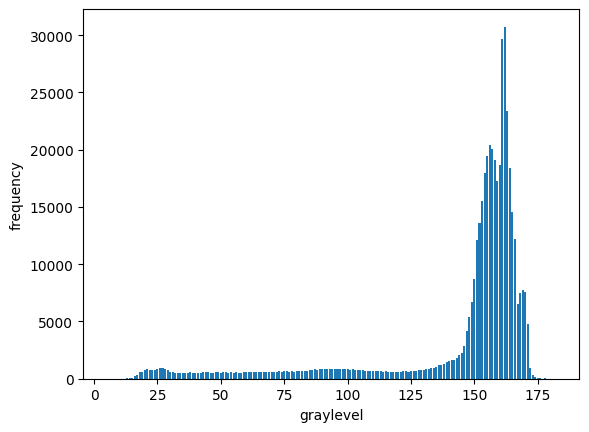

In [346]:
hist, bin_centers = histogram(gray_scale_paper,20)
print(bin_centers)
plt.figure()
plt.bar(bin_centers, hist, width=0.8, align='center')
plt.xlabel("graylevel")
plt.ylabel("frequency")
plt.show()

In [443]:
image = cv2.imread('omr.jpg')
cv2.imshow('omr.jpg',image)
cv2.waitKey(0)
gray_scale_paper=extract_the_paper_from_image(image)
gray_scale_paper=extract_the_paper_from_image(gray_scale_paper)
gray_scale_paper = cv2.cvtColor(gray_scale_paper,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray scale image.jpg',gray_scale)
cv2.waitKey(0)

-1

In [444]:
_,thresholded=cv2.threshold(gray_scale_paper,230,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow('paper1', thresholded)
cv2.waitKey(0)

-1

In [445]:
# _,thresholded=cv2.threshold(gray_scale_paper,150,255, cv2.THRESH_BINARY_INV)
# cv2.imshow('paper2', thresholded)
# cv2.waitKey(0)

In [446]:
pap_cnts,_=cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [447]:
def test_cnts(cnts):
    cv2.drawContours(thresholded, cnts, -1,255, 3)
  
    cv2.imshow('Contours.jpg', thresholded)
    cv2.waitKey(0)

In [448]:
pre_question_cnts=[]
value=(5,50)
i=0
for cnt in pap_cnts:
    (x,y,w,h)=cv2.boundingRect(cnt)
    aspect_ratio=w/h
    if(w>=value[0] and w<=value[1] and h>=value[0] and h<=value[1] and aspect_ratio>=0.8 and aspect_ratio<=1.2):
        pre_question_cnts.append(cnt)

In [449]:
print(len(pre_question_cnts),len(pap_cnts))

158 267


In [450]:
if(len(pre_question_cnts)!=0):
    question_cnts,_=imcnts.sort_contours(pre_question_cnts,method='top-to-bottom')
    xs_set=set()
    i=0

    for cnt in question_cnts:
        (x,y,w,h)=cv2.boundingRect(cnt)
        if(all([ x-i not in xs_set and x+i not in xs_set for i in np.arange(0,5)])):
            xs_set.add(x)
    number_of_bubbles=len(xs_set)
    print(xs_set)
    print("number of bubbles : "+str(number_of_bubbles))
    xs=np.array(list(sorted(xs_set)))
    dist=np.append(xs[1:],xs[-1])-xs
    print("differences:" ,dist)
    distance_set=[]
    for diff in dist:
        if(len(distance_set)==0 or all([ diff-i != distance_set[-1] and diff+i != distance_set[-1] for i in np.arange(0,5)])):
            distance_set.append(diff)
    print(len(distance_set))
    distance_set.pop()
    print(distance_set)
    print(distance_set[1:4])
    #distance_set=[1,1]
    #print("print func",)
    number_of_columns=sum([x > distance_set[i] and x > distance_set[i+2] for i, x in enumerate(distance_set[1:-1])])+1
    number_of_choices=number_of_bubbles//number_of_columns
    print(number_of_choices,number_of_columns)

{390, 395, 525, 784, 663, 156, 431, 567, 704, 195, 76, 467, 599, 474, 605, 352, 487, 743, 235, 624, 369, 115, 507, 383}
number of bubbles : 24
differences: [ 39  41  39  40 117  17  14   7   5  36  36   7  13  20  18  42  32   6
  19  39  41  39  41   0]
14
[39, 117, 17, 7, 36, 7, 13, 20, 42, 32, 6, 19, 39]
[117, 17, 7]
6 4


In [451]:
tt=[i>2 for i in np.arange(1,5)]
print(all(tt))

False


In [452]:
# Answer_key= {0:1, 1:4, 2:0, 3:2}
# correct=0
# flag=False
# cv2.drawContours(paper,question_cnts,0,(255,0,0), 1)
# cv2.imshow('hgsvrgvj',paper)
# cv2.waitKey(0)
# cnt=question_cnts[0]
# peri = cv2.arcLength(cnt,True)
# #print(peri)
# # to approximate the given shape to polygon (high value leads to underestimation and low value leads to overestimation)
# ratio=0.00005
# approx=cv2.approxPolyDP(cnt,ratio*peri,True)
# (x,y,w,h)=cv2.boundingRect(cnt)
# aspect_ratio=w/h
# print(len(approx))
# paper= four_point_transform(image, paper_contour.reshape(4, 2))  

In [453]:
print(len(question_cnts))

158


In [454]:
#test_cnts(question_cnts)

In [455]:
# _,thresholded=cv2.threshold(gray_scale_paper,150,255, cv2.THRESH_BINARY_INV)
# pap_cnts,_=cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [456]:
colors=[(255,0,0)
,(0,255,0)
,(0,0,255)
,(0,255,255)
,(255,255,0)
,(0,0,255)
,(0,255,255)
,(255,0,255)
,(192,192,192)
,(128,128,128)
,(128,0,0)
,(128,128,0)
,(0,128,0)
,(128,0,128)
,(0,128,128)
,(0,0,128),
       (255,215,0)]

In [457]:
counter=0
qs=0
for (row,i) in enumerate(np.arange(0,len(question_cnts),number_of_columns*number_of_choices)):

    curr_row_cnts,_=imcnts.sort_contours(question_cnts[i:i+number_of_columns*number_of_choices])
    for k in np.arange(0,len(curr_row_cnts),number_of_choices):
        curr_ques_cnts=curr_row_cnts[k:k+number_of_choices]
        color1=colors[qs%len(colors)]
        cv2.drawContours(gray_scale_paper,curr_ques_cnts,-1,color1, 1)
        bubbled=None
        for (j,c) in enumerate(curr_ques_cnts):
            mask = np.zeros(thresholded.shape, dtype="uint8")
            #negative one at the last arguement to fill the contours
            cv2.drawContours(mask, [c], -1, 255, -1)
            mask= cv2.bitwise_and(thresholded, mask)
            total= cv2.countNonZero(mask)

            if bubbled is None or total >bubbled[0]:
                bubbled= (total, j)
            color= (0, 0, 255)
        print(f"qestion#{qs+1}: {chr(bubbled[1]+ord('A'))}")
        qs+=1
    counter+=1
print(counter)
counter=0
cv2.imshow('paper', gray_scale_paper)
cv2.waitKey(0)
paper= four_point_transform(image, paper_contour.reshape(4, 2)) 

qestion#1: B
qestion#2: F
qestion#3: C
qestion#4: F
qestion#5: B
qestion#6: A
qestion#7: F
qestion#8: F
qestion#9: A
qestion#10: A
qestion#11: E
qestion#12: A
qestion#13: D
qestion#14: D
qestion#15: F
qestion#16: C
qestion#17: E
qestion#18: A
qestion#19: A
qestion#20: C
qestion#21: D
qestion#22: E
qestion#23: F
qestion#24: D
qestion#25: A
qestion#26: B
qestion#27: A
7


In [438]:
for i,cnt in enumerate(question_cnts):
    color1=(255,0,0) if i%2==0 else (0,0,255)
    cv2.drawContours(paper,[cnt],-1,color1, 1)
# cv2.imshow('paper', paper)
# cv2.waitKey(0)
paper= four_point_transform(image, paper_contour.reshape(4, 2)) 

In [439]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()



In [440]:
print(contours)

[array([[[ 60, 285]],

       [[ 59, 286]],

       [[ 58, 286]],

       ...,

       [[ 63, 285]],

       [[ 62, 285]],

       [[ 61, 285]]], dtype=int32), array([[[ 0, 11]],

       [[ 1, 11]],

       [[ 2, 11]],

       [[ 3, 11]],

       [[ 4, 11]],

       [[ 5, 11]],

       [[ 6, 11]],

       [[ 7, 11]],

       [[ 8, 12]],

       [[ 9, 12]],

       [[10, 12]],

       [[11, 12]],

       [[12, 12]],

       [[13, 12]],

       [[14, 12]],

       [[15, 12]],

       [[16, 12]],

       [[17, 12]],

       [[18, 13]],

       [[19, 13]],

       [[20, 13]],

       [[21, 13]],

       [[22, 13]],

       [[23, 13]],

       [[24, 13]],

       [[25, 13]],

       [[26, 13]],

       [[27, 13]],

       [[28, 13]],

       [[29, 13]],

       [[30, 13]],

       [[31, 13]],

       [[32, 14]],

       [[33, 14]],

       [[32, 13]],

       [[31, 13]],

       [[30, 13]],

       [[29, 13]],

       [[28, 13]],

       [[27, 13]],

       [[26, 13]],

       [[25, 13]],



In [441]:
f"adham{chr(bubbled[1]+ord('A'))}"

'adhamA'